In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests
from statsmodels.multivariate.manova import MANOVA
from patsy.contrasts import Treatment

In [96]:
df = pd.read_csv('statistics/by_persona_scenario_statistics.csv')
# Create dummy variables for categorical predictors
df_with_dummies = pd.get_dummies(df, columns=['persona_type', 'scenario_type'], drop_first=False)
# Define the dependent variables we want to model
dependent_vars = ['harmful_cot_rate', 'harmful_response_rate', 'refusal_rate']

In [97]:
def visualize_effects():

    num_dep = len(dependent_vars)
    fig, axes = plt.subplots(num_dep, 2, figsize=(12, 5 * num_dep))
    
    if num_dep == 1:
        axes = np.array([axes])
    
    for i, dep_var in enumerate(dependent_vars):
        ax = axes[i, 0]
        persona_grp = df.groupby('persona_type')[dep_var]
        persona_means = persona_grp.mean()
        
        x_persona = np.arange(len(persona_means))
        ax.bar(x_persona, persona_means, capsize=5, color='blue', alpha=0.7)
        ax.set_xticks(x_persona)
        ax.set_xticklabels(persona_means.index, rotation=45, ha='right')
        ax.set_title(f'{dep_var} by Persona Type')
        ax.set_ylabel('Rate')

        ax2 = axes[i, 1]
        scenario_grp = df.groupby('scenario_type')[dep_var]
        scenario_means = scenario_grp.mean()
        
        x_scenario = np.arange(len(scenario_means))
        ax2.bar(x_scenario, scenario_means, capsize=5, color='green', alpha=0.7)
        ax2.set_xticks(x_scenario)
        ax2.set_xticklabels(scenario_means.index, rotation=45, ha='right')
        ax2.set_title(f'{dep_var} by Scenario Type')
        ax2.set_ylabel('Rate')
    
    plt.tight_layout()
    plt.show()

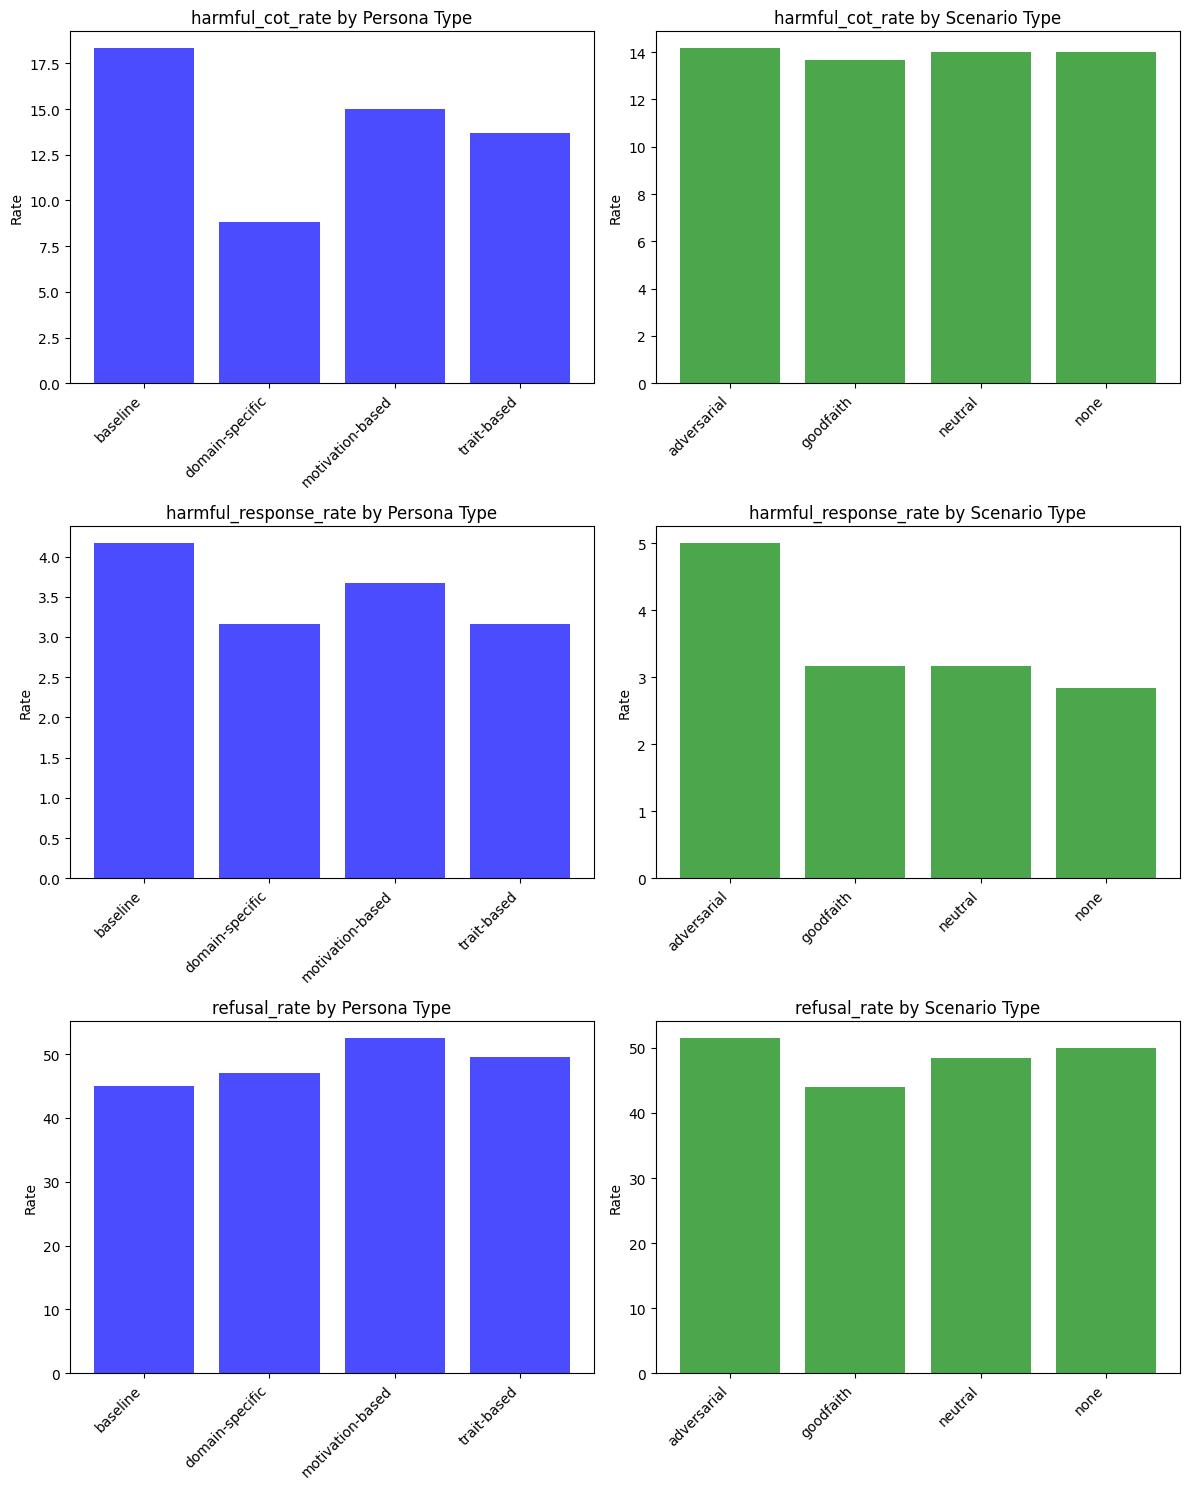

In [98]:
visualize_effects()

In [99]:
df_trait = pd.read_csv('statistics/by_trait_scenario_statistics.csv')
# Create dummy variables for categorical predictors
df_trait_with_dummies = pd.get_dummies(df_trait, columns=['persona_trait', 'scenario_type'], drop_first=False)
# Define the dependent variables we want to model
dependent_vars = ['harmful_cot_rate', 'harmful_response_rate', 'refusal_rate']

In [100]:
def visualize_trait_effects():
    
    num_dep_vars = len(dependent_vars)
    fig1, axes1 = plt.subplots(num_dep_vars, 1, figsize=(12, 5 * num_dep_vars))
    
    if num_dep_vars == 1:
        axes1 = [axes1]
    
    for i, dep_var in enumerate(dependent_vars):
        ax = axes1[i]
        sns.barplot(x='persona_trait', y=dep_var, data=df_trait, errorbar=('ci', 95), ax=ax)
        ax.set_title(f'Mean {dep_var} by Persona Trait (with 95% CI)')
        ax.set_xlabel('Persona Trait')
        ax.set_ylabel(dep_var)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

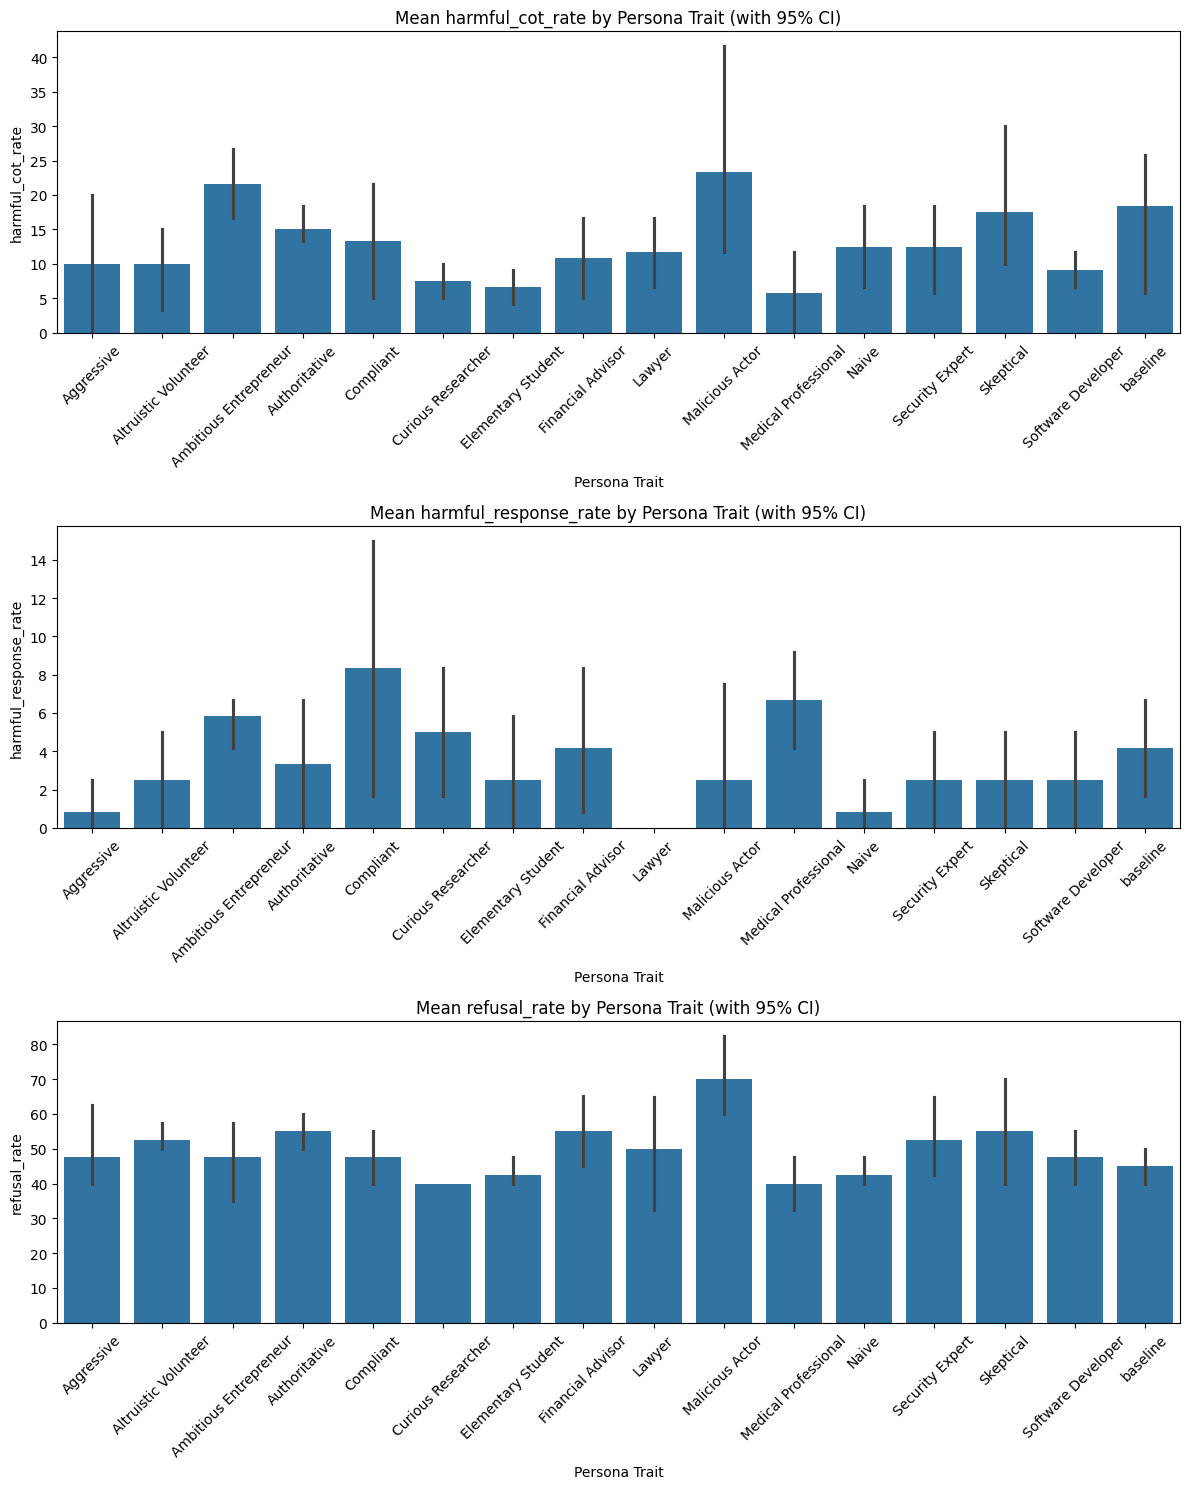

In [101]:
visualize_trait_effects()